In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df = pd.read_excel("/content/ALY6080_5Gyres_BrandAudit_DataCleaning.xlsx")
df

,brand_name,parent_company_name,id,link,country,sum,validated
0,la doo waters nig,la doo,NaN,NaN,"Nigeria, Nigeria",28742,ATTEMPTED
1,pure water,"pure water, inc.",NaN,NaN,"Nigeria, Benin, Thailand, Benin, Mexico",10335,ATTEMPTED
2,barna,barna,https://ng-check.com/barna-global-resources-lt...,NaN,Nigeria,7205,ATTEMPTED
3,kariakoo,kariakoo,NaN,NaN,"Tanzania, Tanzania",3816,ATTEMPTED
4,master chef,master chef,https://www.facebook.com/masterchefnigltd/,NaN,"Nigeria, Nigeria, Nigeria",3623,ATTEMPTED
...,...,...,...,...,...,...,...
20540,plastic bottle 1l,unbranded,NaN,NaN,Cyprus,0,True
20541,unknown alcohol,unbranded,NaN,NaN,Cyprus,0,True
20542,unknown plastic straws,unbranded,NaN,NaN,Portugal,0,True
20543,unknown tents,unbranded,NaN,NaN,United States of America,0,True


In [ ]:
df.index = pd.RangeIndex(start=0, stop=len(df), step=1)
df.drop('id', axis=1, inplace=True)


In [ ]:
df.drop_duplicates(subset=['brand_name', 'sum'], inplace=True)

In [ ]:
df['validated'] = df['validated'].map({'ATTEMPTED': False, True: True})


In [ ]:
df = df.dropna(subset=['brand_name', 'parent_company_name'])

company_counts = df.groupby('parent_company_name')['brand_name'].nunique()

company_counts = company_counts.sort_values(ascending=False)
print(company_counts.head(10))

parent_company_name
nestlé                    219
the coca-cola company     215
pepsico                   201
unilever                  196
mondelez international    142
jg summit holdings         89
unbranded                  88
procter & gamble           71
wings                      68
mayora indah               67
Name: brand_name, dtype: int64


In [ ]:
print(df.isnull().sum())

brand_name                 0
parent_company_name        0
link                   14760
country                    1
sum                        0
validated              19401
dtype: int64


In [ ]:
df = df.drop([ 'link'], axis=1)

In [ ]:
df = df.drop_duplicates()



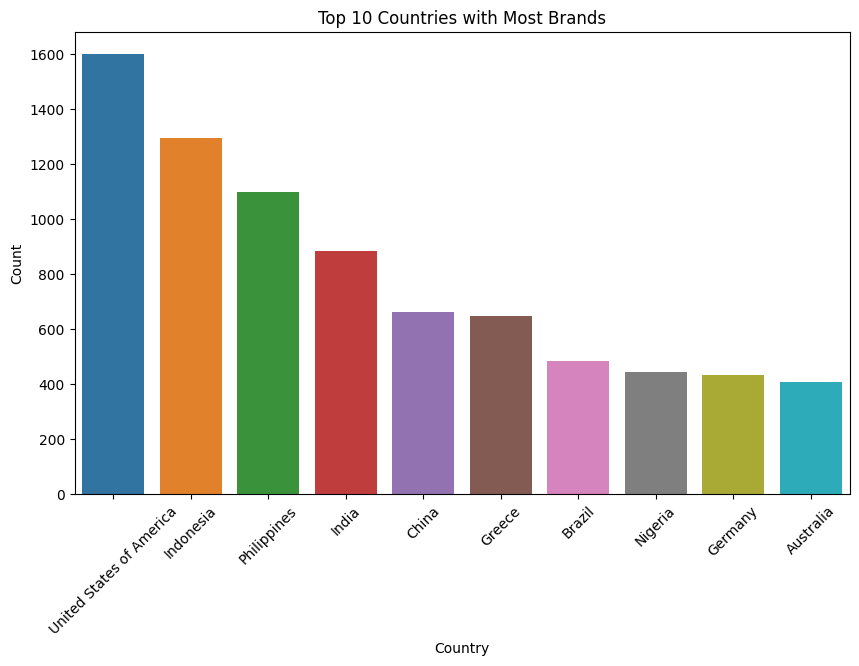

In [ ]:
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with Most Brands')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = df[df['sum'] > 0]

# Data analysis
top_countries = df.groupby('country')['sum'].sum().sort_values(ascending=False).head(10)
print(top_countries)

country
Nigeria                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

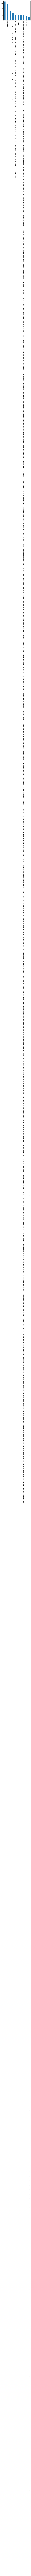

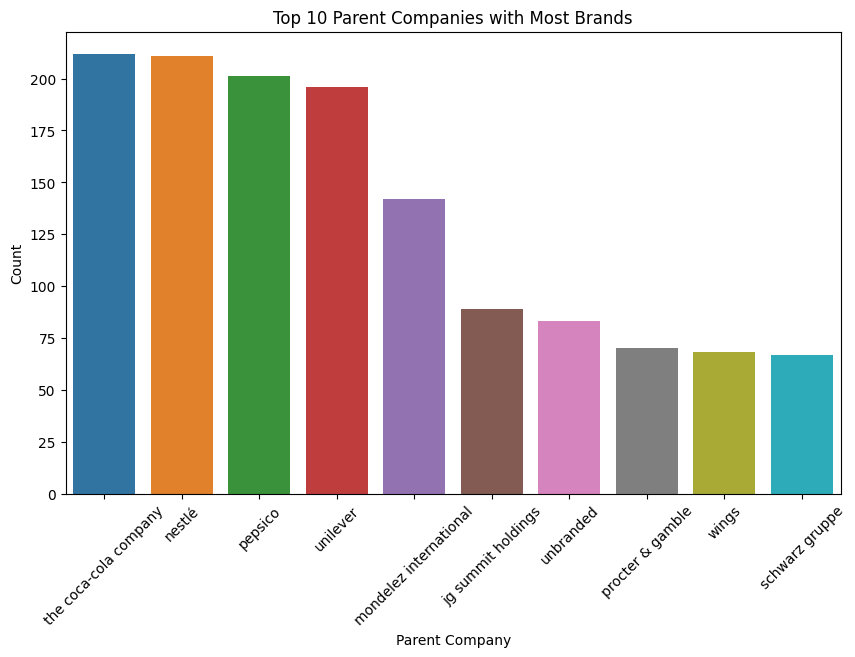

In [ ]:
top_countries.plot(kind='bar')
plt.show()
parent_company_counts = df['parent_company_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=parent_company_counts.index, y=parent_company_counts.values)
plt.title('Top 10 Parent Companies with Most Brands')
plt.xlabel('Parent Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
freq_table = df.groupby(['parent_company_name', 'country']).size().reset_index(name='count')
freq_table

,parent_company_name,country,count
0,0,India,1
1,1,Ghana,1
2,1,Switzerland,1
3,7,Russian Federation,1
4,22,Russian Federation,1
...,...,...,...
17093,"‎c.i dulces la americana s.a, sayona","Tanzania, Denmark, Tanzania",1
17094,‎pro dp,Germany,1
17095,‎seagull,Germany,1
17096,欧蓓 儿,Kuwait,1


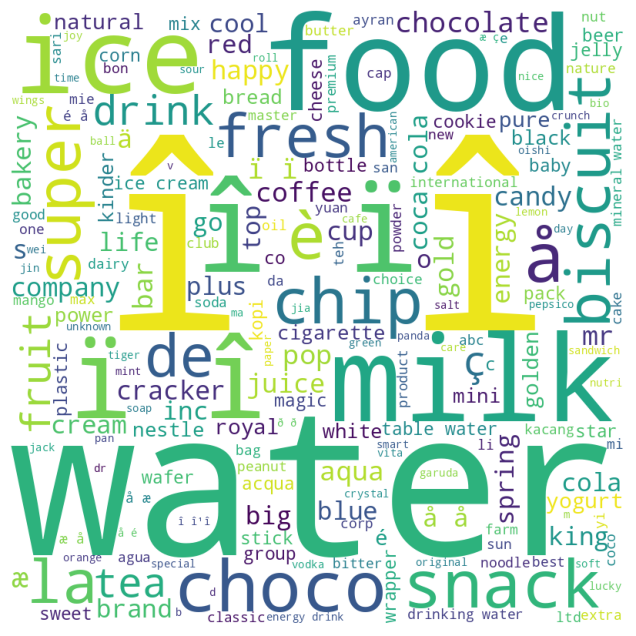

In [ ]:
from wordcloud import WordCloud

brands = df['brand_name'].apply(lambda x: str(x) if type(x) == str else '')

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(' '.join(brands))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
summary_stats = df.describe()
summary_stats

,sum
count,19894.000000
mean,34.216497
std,351.491226
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,28742.000000


In [ ]:
country_counts = df['country'].value_counts().head(10)
country_counts

United States of America    1493
Indonesia                   1246
Philippines                 1098
India                        835
China                        662
Greece                       648
Brazil                       482
Nigeria                      438
Germany                      432
Australia                    407
Name: country, dtype: int64

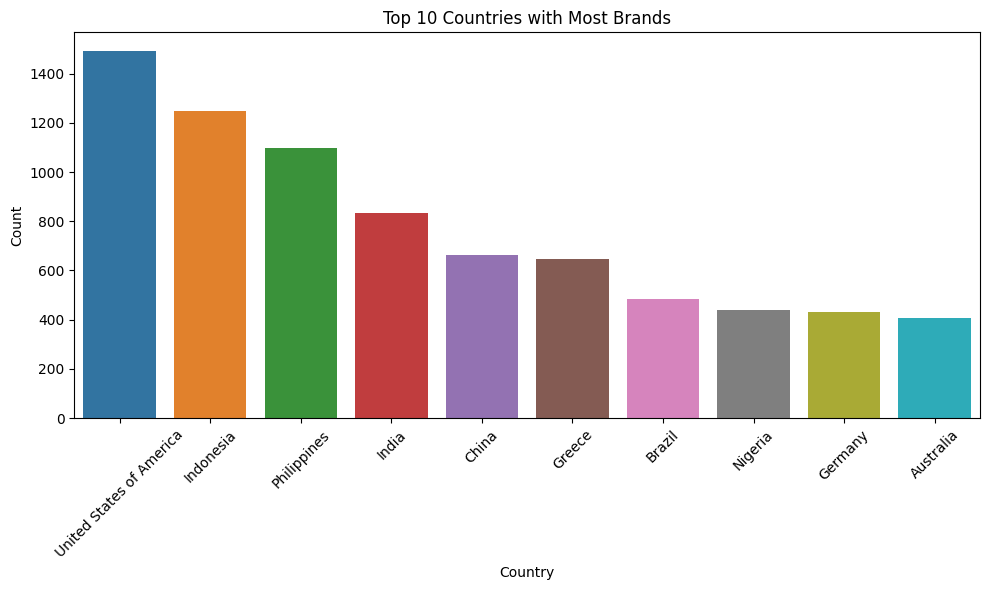

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with Most Brands')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
df

,brand_name,parent_company_name,country,sum,validated
0,la doo waters nig,la doo,"Nigeria, Nigeria",28742,False
1,pure water,"pure water, inc.","Nigeria, Benin, Thailand, Benin, Mexico",10335,False
2,barna,barna,Nigeria,7205,False
3,kariakoo,kariakoo,"Tanzania, Tanzania",3816,False
4,master chef,master chef,"Nigeria, Nigeria, Nigeria",3623,False
...,...,...,...,...,...
20534,unknown mask,unbranded,United States of America,1,True
20535,unknown sauce packet,unbranded,United States of America,1,True
20536,verkerks,verkerks,New Zealand,1,True
20537,yates,nippon paint holdings,New Zealand,1,True


In [ ]:
average_sum_by_country = df.groupby('country')['sum'].mean().reset_index()

# Sort the average sum values in descending order
average_sum_by_country = average_sum_by_country.sort_values('sum', ascending=False)

# Select the top 10 countries by average sum
top_10_countries = average_sum_by_country.head(10)
top_10_countries

,country,sum
1990,"United States of America, Portugal, Australia,...",14620.0
1228,"Morocco, South Korea, Slovenia, Slovenia, Slov...",11164.0
1247,"Nigeria, Benin, Thailand, Benin, Mexico",10335.0
953,"Italy, Italy, United States of America, Austri...",10320.0
1493,"Russian Federation, Hungary, Italy, Canada, Un...",8031.0
1518,"Russian Federation, Russian Federation, United...",7061.0
138,"Bhutan, Bhutan",7000.0
1698,"Switzerland, Ukraine, France, Cyprus, Philippi...",6282.0
244,"Canada, Canada, Canada, United States of Ameri...",5589.0
1760,"Tanzania, Tanzania, Tanzania, Tanzania, Tanzan...",5230.0


In [ ]:
df['num_words_brand_name'] = df['brand_name'].apply(lambda x: len(str(x).split()))
df['parent_company_name_length'] = df['parent_company_name'].apply(lambda x: len(str(x)))
df['num_words_parent_company_name'] = df['parent_company_name'].apply(lambda x: len(str(x).split()))

df['num_countries'] = df['country'].apply(lambda x: len(str(x).split(',')) if isinstance(x, str) else np.nan)
df['log_sum'] = np.log(df['sum'])
df['brand_country_same'] = df['brand_name'].str.lower() == df['country'].str.lower()

df.drop(['brand_name', 'parent_company_name', 'country'], axis=1, inplace=True)

In [ ]:
df.describe()

,sum,num_words_brand_name,parent_company_name_length,num_words_parent_company_name,num_countries,log_sum
count,19894.000000,19894.000000,19894.000000,19894.000000,19893.000000,19894.000000
mean,34.216497,1.784005,15.960440,2.444858,3.087870,1.152541
std,351.491226,1.252532,12.343029,1.781750,22.979892,1.528456
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,8.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,13.000000,2.000000,1.000000,0.693147
75%,6.000000,2.000000,20.000000,3.000000,2.000000,1.791759
max,28742.000000,45.000000,255.000000,43.000000,2095.000000,10.266115


In [ ]:
df

,sum,validated,num_words_brand_name,parent_company_name_length,num_words_parent_company_name,num_countries,log_sum,brand_country_same
0,28742,False,4,6,2,2.0,10.266115,False
1,10335,False,2,16,3,5.0,9.243291,False
2,7205,False,1,5,1,1.0,8.882531,False
3,3816,False,1,8,1,2.0,8.246958,False
4,3623,False,2,11,2,3.0,8.195058,False
...,...,...,...,...,...,...,...,...
20534,1,True,2,9,1,1.0,0.000000,False
20535,1,True,3,9,1,1.0,0.000000,False
20536,1,True,1,8,1,1.0,0.000000,False
20537,1,True,1,21,3,1.0,0.000000,False


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X = df.drop(['sum', 'validated', 'brand_country_same'], axis=1)  # Input features
y = df['brand_country_same']  # Target variable

# Replace NaN values with False
X = X.fillna(0)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
498/498 [==============================] - 3s 3ms/step - loss: 0.0267 - accuracy: 0.9891 - val_loss: 4.7065e-05 - val_accuracy: 1.0000
Epoch 2/10
498/498 [==============================] - 1s 2ms/step - loss: 1.9560e-05 - accuracy: 1.0000 - val_loss: 1.2214e-05 - val_accuracy: 1.0000
Epoch 3/10
498/498 [==============================] - 1s 2ms/step - loss: 6.6482e-06 - accuracy: 1.0000 - val_loss: 5.4714e-06 - val_accuracy: 1.0000
Epoch 4/10
498/498 [==============================] - 1s 2ms/step - loss: 3.2609e-06 - accuracy: 1.0000 - val_loss: 3.0187e-06 - val_accuracy: 1.0000
Epoch 5/10
498/498 [==============================] - 1s 3ms/step - loss: 1.8766e-06 - accuracy: 1.0000 - val_loss: 1.8379e-06 - val_accuracy: 1.0000
Epoch 6/10
498/498 [==============================] - 1s 3ms/step - loss: 1.1766e-06 - accuracy: 1.0000 - val_loss: 1.2004e-06 - val_accuracy: 1.0000
Epoch 7/10
498/498 [==============================] - 1s 2ms/step - loss: 7.7518e-07 - accuracy: 1.0000 

In [ ]:
predictions = model.predict(X)

# Convert predictions to boolean values, handling NaN values
predictions = [bool(round(p[0])) if not np.isnan(p[0]) else False for p in predictions]

# Add predictions to the dataframe
df['predictions'] = predictions

# Print the updated dataframe
print(df)

622/622 [==============================] - 3s 4ms/step
         sum validated  num_words_brand_name  parent_company_name_length  \
0      28742     False                     4                           6   
1      10335     False                     2                          16   
2       7205     False                     1                           5   
3       3816     False                     1                           8   
4       3623     False                     2                          11   
...      ...       ...                   ...                         ...   
20534      1      True                     2                           9   
20535      1      True                     3                           9   
20536      1      True                     1                           8   
20537      1      True                     1                          21   
20538      1      True                     1                          21   

       num_words_parent_company_

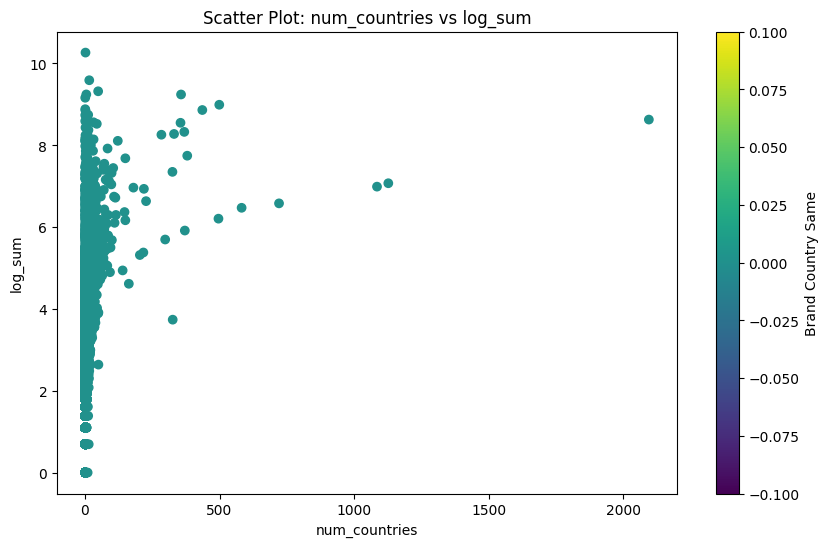

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_countries'], df['log_sum'], c=df['brand_country_same'], cmap='viridis')
plt.title('Scatter Plot: num_countries vs log_sum')
plt.xlabel('num_countries')
plt.ylabel('log_sum')
plt.colorbar(label='Brand Country Same')
plt.show()